# Data Augmentation


In [1]:
import random
import skimage as sk
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import util
import imageio


from matplotlib.pyplot import imshow
import numpy as np
import cv2


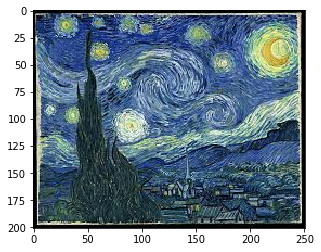

In [2]:
starry = cv2.imread('starry.jpeg')
starry_rgb = cv2.cvtColor(starry, cv2.COLOR_BGR2RGB)
imshow(np.asarray(starry_rgb))


-1.444513821


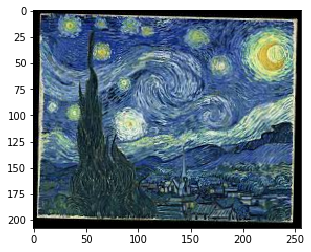

In [3]:
def random_rotation(image):
    # pick a random degree of rotation between 15% on the left and 15% on the right
    rand_degree = random.uniform(-15, 15)
    print(rand_degree)
    return sk.transform.rotate(image, rand_degree, True)

starry_rot = random_rotation(starry_rgb)
imshow(np.asarray(starry_rot))


-10.9328413655


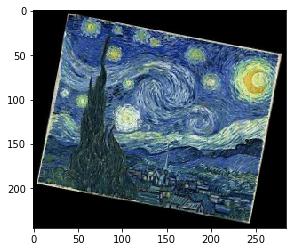

In [4]:
from scipy import ndimage

def random_rotation_ndimage(image):
    # pick a random degree of rotation between 15% on the left and 15% on the right
    rand_degree = random.uniform(-15, 15)
    return ndimage.rotate(image, 45, reshape=False) # reshape = True
   
starry_rot = random_rotation(starry_rgb)
imshow(np.asarray(starry_rot))


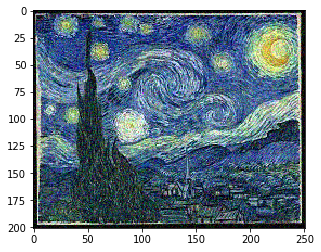

In [5]:
def random_noise(image):
    # add random noise to the image
    return sk.util.random_noise(image)

starry_noisy = random_noise(starry_rgb)
imshow(np.asarray(starry_noisy))


True


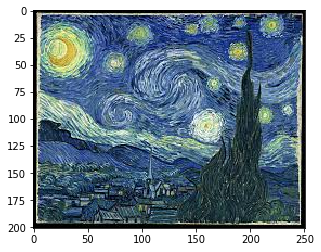

In [6]:
def horizontal_flip(image):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    print(np.all(np.fliplr(image) == image[:, ::-1]))
    # return image[:, ::-1]
    return np.fliplr(image)
    
starry_flipped = horizontal_flip(starry_rgb)
imshow(np.asarray(starry_flipped))


In [3]:
def scale_image(image):
    scaled_image = rescale(image, scale=2.5, mode='constant')
    return scaled_image
    
starry_scaled = scale_image(starry)
cv2.imshow("starry",np.asarray(starry))
cv2.imshow("starry_scaled", np.asarray(starry_scaled))
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'starry' is not defined

In [ ]:
def resize_image(image):
    print(image.shape)
    image_resized = cv2.resize(image, (int( image.shape[1] / 2), int(image.shape[0] / 2)))
    return image_resized
    
starry_resized = resize_image(starry)
print(starry_resized.shape)
cv2.imshow("starry",np.asarray(starry))
cv2.imshow("starry_resized",np.asarray(starry_resized))
cv2.waitKey(0)
cv2.destroyAllWindows()

(201, 251, 3)
(100, 125, 3)


In [ ]:

def translate(image):
    num_rows, num_cols = image.shape[:2]
    print(num_rows,num_cols)
    translation_matrix = np.float32([ [1,0,70], [0,1,0] ])
    img_translation = cv2.warpAffine(image, translation_matrix, (num_cols, num_rows))
    return img_translation

pikachu = cv2.imread("pikachu.jpg")
pikachu_moves = translate(pikachu)
cv2.imshow("pikachu",np.asarray(pikachu))
cv2.imshow("floating away!!!",np.asarray(pikachu_moves))
cv2.waitKey(0)
cv2.destroyAllWindows()

(360, 480)


In [ ]:
def get_crops(image):
    crops = []
    num_rows, num_cols = image.shape[:2]
    crop_left_up = image[0:(num_rows//2),0:(num_cols//2)]
    crop_right_up = image[num_rows//2:num_rows,0:num_cols//2]
    crop_right_down = image[num_rows//2:num_rows,num_cols//2:num_cols]
    crop_left_down = image[0:num_rows//2,num_cols//2:num_cols]
    crop_center = image[num_rows//2-num_rows//4: num_rows//2+num_rows//4, num_cols//2-num_cols//4: num_cols//2+num_cols//4]
    crops.append(crop_left_up)
    crops.append(crop_right_up)
    crops.append(crop_right_down)
    crops.append(crop_left_down)
    crops.append(crop_center)
    return crops
    
fruits = cv2.imread("fruits.jpg")
image_crops = []
image_crops = get_crops(fruits)
cv2.imshow("all fruits",np.asarray(fruits))
cv2.imshow("mango",np.asarray(image_crops[0]))
cv2.imshow("raspberry",np.asarray(image_crops[1]))
cv2.imshow("orange",np.asarray(image_crops[2]))
cv2.imshow("strawberry",np.asarray(image_crops[3]))
cv2.imshow("pineapple",np.asarray(image_crops[4]))

cv2.waitKey(0)
cv2.destroyAllWindows()

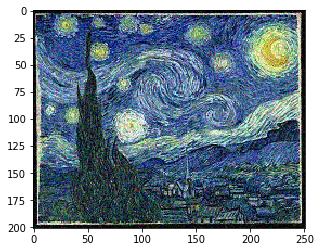

In [11]:
def gausian_noise(image):
    # add noise to the image
    return sk.util.random_noise(image,mode='gaussian',seed=100,clip=True)

starry_noisy = gausian_noise(starry_rgb)
imshow(np.asarray(starry_noisy))

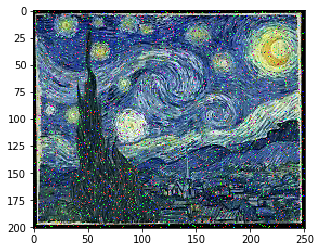

In [9]:
def gausian_noise(image):
    # add noise to the image
    return sk.util.random_noise(image,mode='s&p',seed=None,clip=True)

starry_noisy = gausian_noise(starry_rgb)
imshow(np.asarray(starry_noisy))